In [1]:
from ResearchMain import *

In [2]:
# 数据
df = sediment_size_df
# df

In [3]:
# 预处理
df.dropna(how='all', inplace=True)  # 删除缺失值（行全为空与列全为空）
df.dropna(how='all', axis=1, inplace=True)
df = df[[i for i in df.columns if i < 400]]
df = df.copy()
df.loc[:, ['Period', 'River']] = all_df.loc[:, ['Period', 'River']]
df.reset_index(inplace=True)
df = df.melt(id_vars=['index', 'Period', 'River'])
# df

In [4]:
df

,index,Period,River,Size (µm),value
0,D-N1,Dry Season,Nanfei River,0.955,0.04
1,D-N2,Dry Season,Nanfei River,0.955,NaN
2,D-N3,Dry Season,Nanfei River,0.955,NaN
3,D-N4,Dry Season,Nanfei River,0.955,0.03
4,D-N5,Dry Season,Nanfei River,0.955,0.03
...,...,...,...,...,...
3955,W-H8,Wet Season,Hangbu River,363.078,0.87
3956,W-H9,Wet Season,Hangbu River,363.078,1.11
3957,W-H10,Wet Season,Hangbu River,363.078,0.74
3958,W-H11,Wet Season,Hangbu River,363.078,0.91


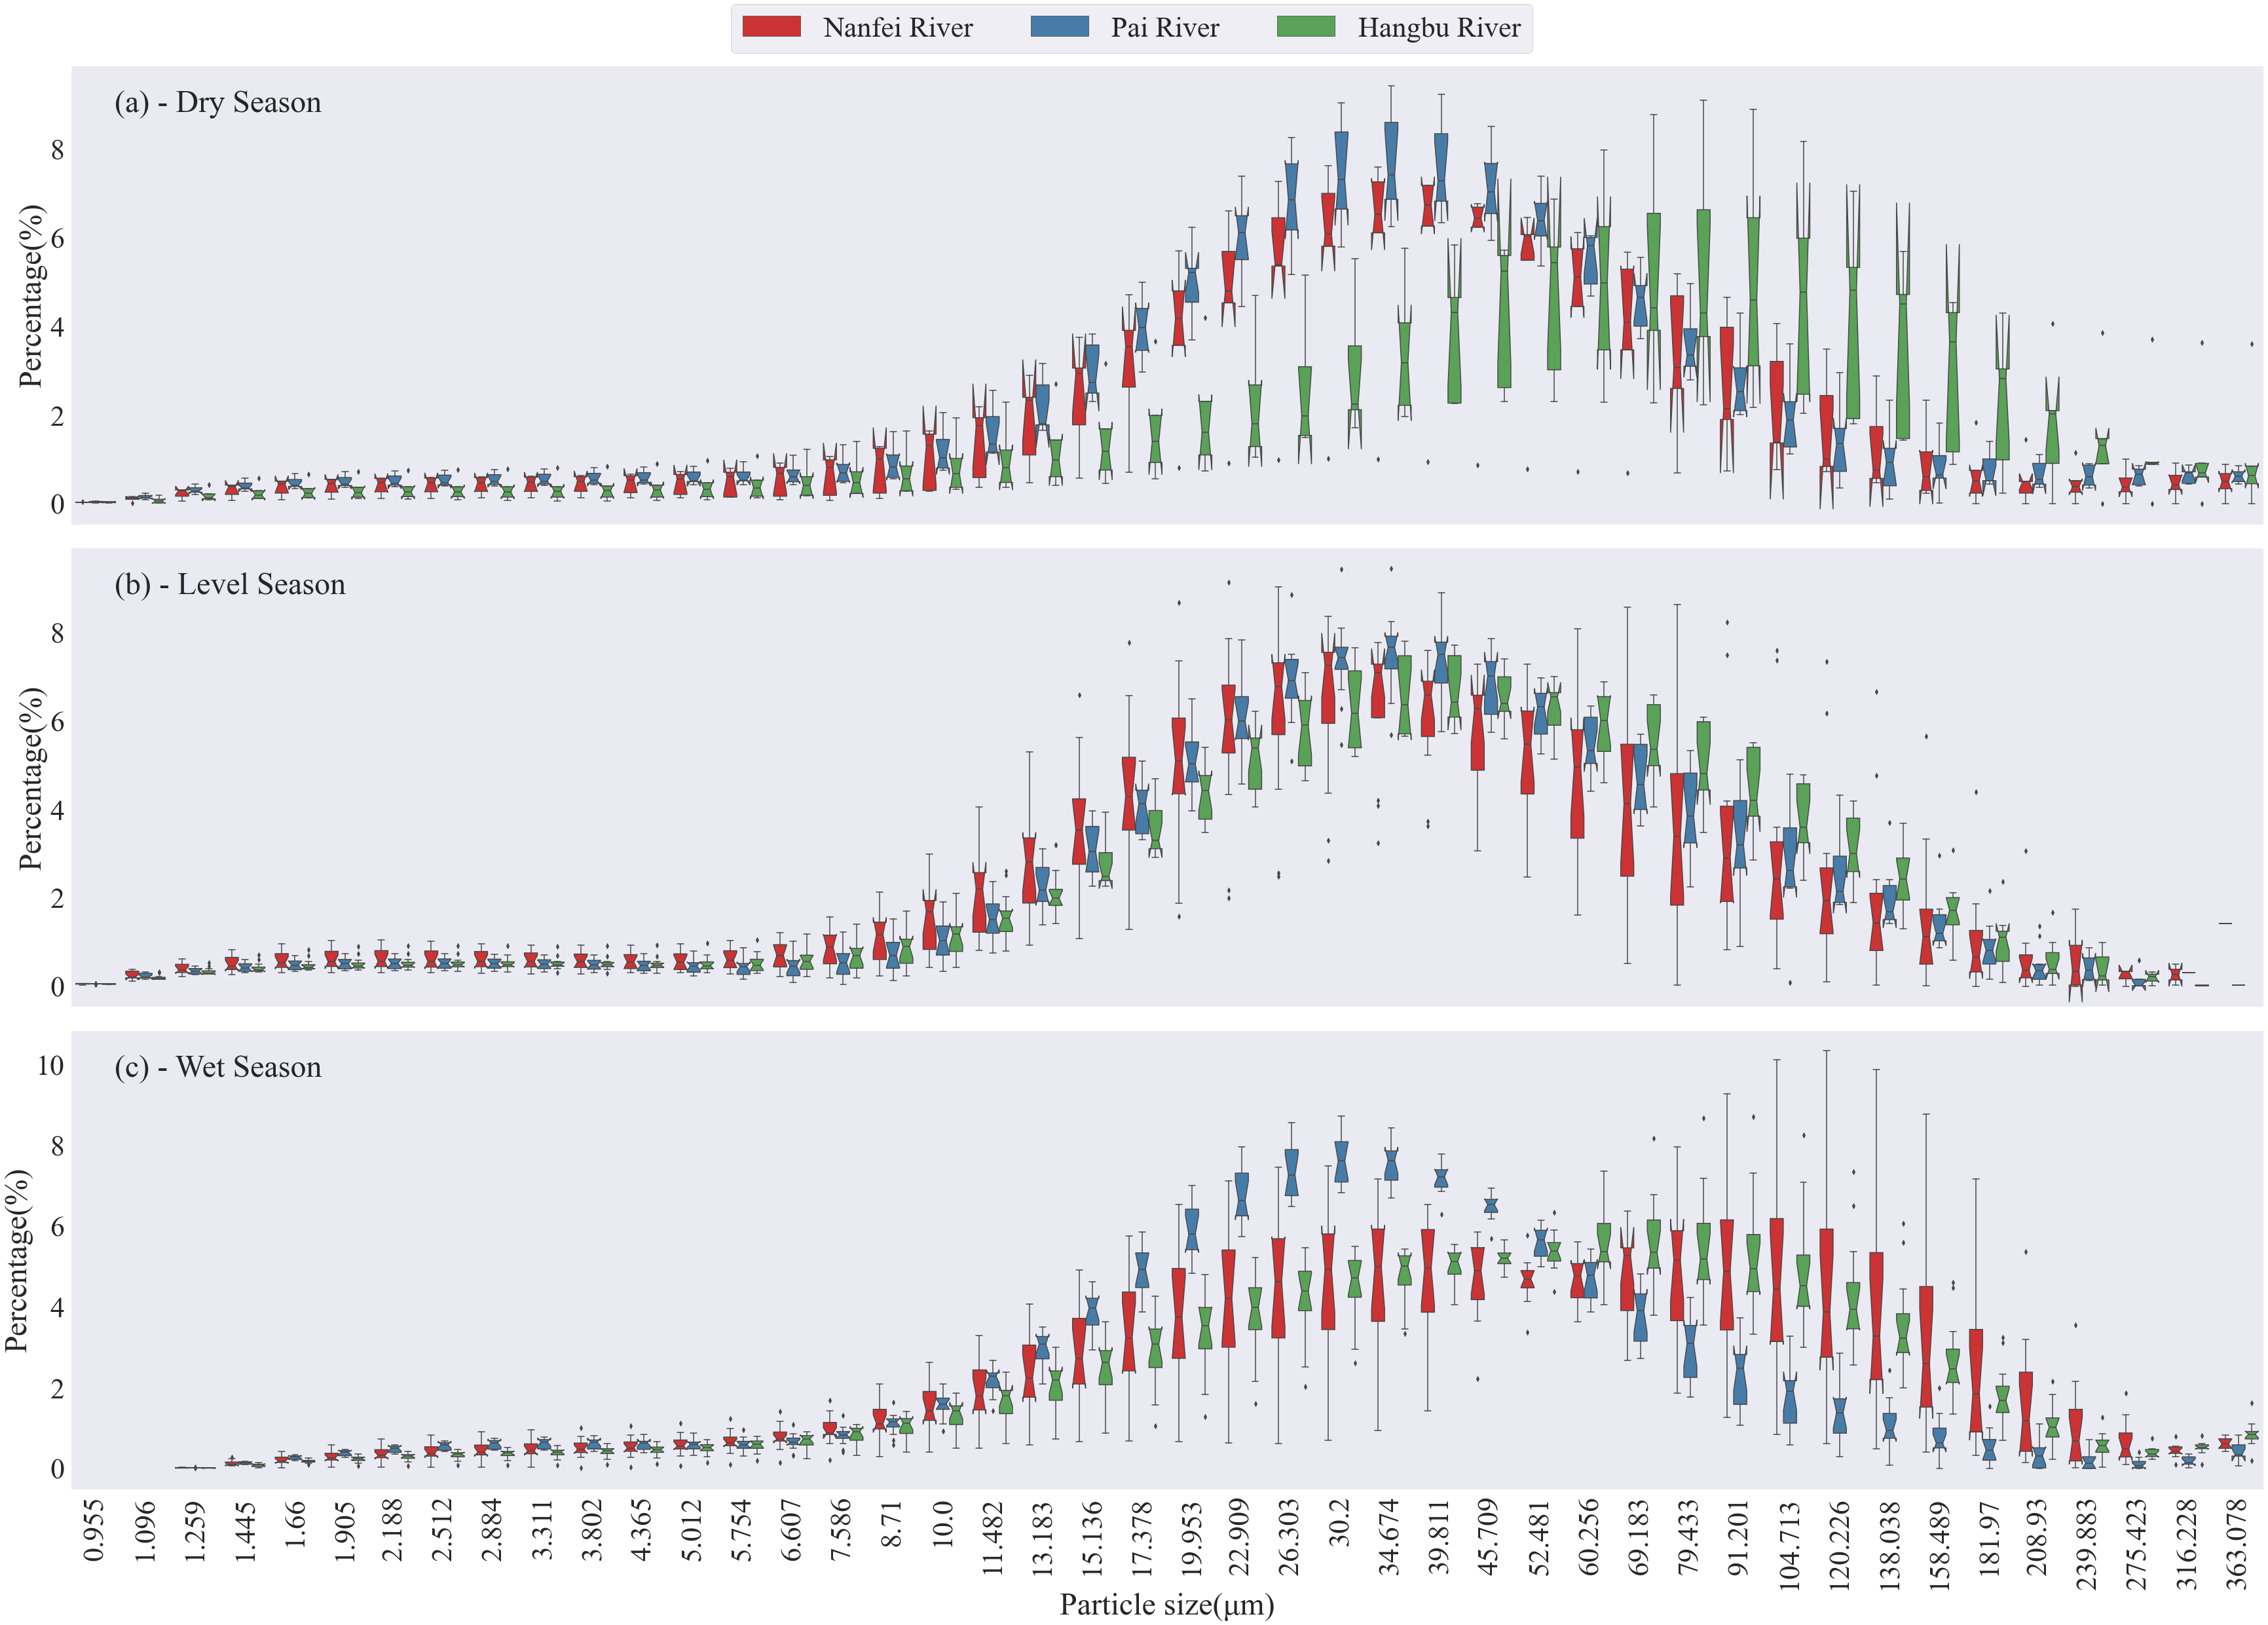

In [6]:
fig, ax_arr = plt.subplots(len(period_list), 1, figsize=(60, 40), sharex='col')
fig.subplots_adjust(hspace=0.05)  # 设置子图的横纵间距
sns.set_theme(style="dark", font='Times New Roman', font_scale=4)

for i in range(len(ax_arr)):
    item = sns.boxplot(
        x="Size (µm)",
        y="value",
        hue="River",
        data=df[df['Period'] == period_list[i]],
        palette="Set1",  # 颜色版
        notch=True,  # 加入缺口
        ax=ax_arr[i]
    )

    # 删除子图的图例
    item.get_legend().remove()
    # 子图添加编号
    item.text(
        0.02,
        0.9,
        f"({CHAR[i]}) - {period_list[i]}",
        transform=item.transAxes,  # 默认的话前两个参数是(x, y)坐标，设置该属性后是相较于x、y轴的比例
        # fontdict={'size': '16', 'color': 'b'}
    )
    # 设置子图x轴名称，只保留最后一个子图的轴名称，其余删除
    if i != len(ax_arr) - 1:
        item.set_xlabel(None)
    else:
        item.set_xlabel('Particle size(μm)')
    # 设置子图y轴名称
    item.set_ylabel('Percentage(%)')

plt.xticks(rotation=90)  # x轴坐标文字旋转（这个x轴是整个主图的x轴，因此使用plt.xticks()来设置属性，使用ax_arr[1].set_xlabel()会报错）
# 添加图例
lines, labels = fig.axes[-1].get_legend_handles_labels()  # 三个子图的图例相同，获取最后一个子图的图例
fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0.92))
# 保存
plt.savefig(EXPORT_PATH + '粒径分布百分比图' + IMG_TYPE, dpi=DPI, bbox_inches='tight')